# Árvores II - Tarefa 2

### 1. Carregar as bases

Vamos carregar as bases lidas na tarefa passada. Se você salvou essas bases em arquivo texto, basta fazer a leitura com o comando ```pd.read_csv``` das seguintes bases:

- X_train
- Y_train
- X_test
- Y_test

Não se esqueça de considerar a leitura dos índices dos arquivos no ```read_csv()```!

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score


In [16]:
X_train = pd.read_csv(
    filepath_or_buffer='./bases_mod_17/X_train.csv')
X_train = X_train.drop(columns=['Unnamed: 0'])

X_train

,subject_train,1 tBodyAcc-mean()-X,2 tBodyAcc-mean()-Y,3 tBodyAcc-mean()-Z,4 tBodyAcc-std()-X,5 tBodyAcc-std()-Y,6 tBodyAcc-std()-Z,7 tBodyAcc-mad()-X,8 tBodyAcc-mad()-Y,9 tBodyAcc-mad()-Z,...,552 fBodyBodyGyroJerkMag-meanFreq(),553 fBodyBodyGyroJerkMag-skewness(),554 fBodyBodyGyroJerkMag-kurtosis(),"555 angle(tBodyAccMean,gravity)","556 angle(tBodyAccJerkMean),gravityMean)","557 angle(tBodyGyroMean,gravityMean)","558 angle(tBodyGyroJerkMean,gravityMean)","559 angle(X,gravityMean)","560 angle(Y,gravityMean)","561 angle(Z,gravityMean)"
0,1,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,1,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,1,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,1,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,30,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,...,-0.070157,-0.588433,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819
7348,30,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,...,0.165259,-0.390738,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053
7349,30,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,...,0.195034,0.025145,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811
7350,30,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,...,0.013865,0.063907,-0.344314,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339


In [17]:
y_train = (pd.read_csv
           (filepath_or_buffer='./human+activity+recognition+using+smartphones/UCI HAR Dataset/UCI HAR Dataset/train/y_train.txt',header=None)
           .squeeze('columns'))
y_train

0       5
1       5
2       5
3       5
4       5
       ..
7347    2
7348    2
7349    2
7350    2
7351    2
Name: 0, Length: 7352, dtype: int64

In [18]:
X_test = pd.read_csv(
    filepath_or_buffer='./bases_mod_17/X_test.csv')
X_test = X_test.drop(columns=['Unnamed: 0'])
X_test

,subject_test,1 tBodyAcc-mean()-X,2 tBodyAcc-mean()-Y,3 tBodyAcc-mean()-Z,4 tBodyAcc-std()-X,5 tBodyAcc-std()-Y,6 tBodyAcc-std()-Z,7 tBodyAcc-mad()-X,8 tBodyAcc-mad()-Y,9 tBodyAcc-mad()-Z,...,552 fBodyBodyGyroJerkMag-meanFreq(),553 fBodyBodyGyroJerkMag-skewness(),554 fBodyBodyGyroJerkMag-kurtosis(),"555 angle(tBodyAccMean,gravity)","556 angle(tBodyAccJerkMean),gravityMean)","557 angle(tBodyGyroMean,gravityMean)","558 angle(tBodyGyroJerkMean,gravityMean)","559 angle(X,gravityMean)","560 angle(Y,gravityMean)","561 angle(Z,gravityMean)"
0,2,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,...,0.071645,-0.330370,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978
1,2,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,...,-0.401189,-0.121845,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898
2,2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,...,0.062891,-0.190422,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346
3,2,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,...,0.116695,-0.344418,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108
4,2,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,...,-0.121711,-0.534685,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2942,24,0.310155,-0.053391,-0.099109,-0.287866,-0.140589,-0.215088,-0.356083,-0.148775,-0.232057,...,0.074472,-0.376278,-0.750809,-0.337422,0.346295,0.884904,-0.698885,-0.651732,0.274627,0.184784
2943,24,0.363385,-0.039214,-0.105915,-0.305388,0.028148,-0.196373,-0.373540,-0.030036,-0.270237,...,0.101859,-0.320418,-0.700274,-0.736701,-0.372889,-0.657421,0.322549,-0.655181,0.273578,0.182412
2944,24,0.349966,0.030077,-0.115788,-0.329638,-0.042143,-0.250181,-0.388017,-0.133257,-0.347029,...,-0.066249,-0.118854,-0.467179,-0.181560,0.088574,0.696663,0.363139,-0.655357,0.274479,0.181184
2945,24,0.237594,0.018467,-0.096499,-0.323114,-0.229775,-0.207574,-0.392380,-0.279610,-0.289477,...,-0.046467,-0.205445,-0.617737,0.444558,-0.819188,0.929294,-0.008398,-0.659719,0.264782,0.187563


In [19]:
y_test = (pd.read_csv
          (filepath_or_buffer='./human+activity+recognition+using+smartphones/UCI HAR Dataset/UCI HAR Dataset/test/y_test.txt',header=None)
          .squeeze('columns')
         )
y_test

0       5
1       5
2       5
3       5
4       5
       ..
2942    2
2943    2
2944    2
2945    2
2946    2
Name: 0, Length: 2947, dtype: int64

### 2. Divisão da base em Treino, Validação e Teste

A base já se encontra dividida em Treino e Validação. O que vamos fazer então é extrair uma base de Validação da base de Treino.

Extraia 25% da base de treino como base de validação.

In [20]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, 
                                                      y_train, 
                                                      test_size=0.25, 
                                                      random_state=42)

print('X_train:', X_train.shape)
print('y_train:', y_train.shape)

print('X_valid:', X_valid.shape)
print('y_valid:', y_valid.shape)

print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X_train: (5514, 562)
y_train: (5514,)
X_valid: (1838, 562)
y_valid: (1838,)
X_test: (2947, 562)
y_test: (2947,)


### 3. Melhores 3 variáveis

Rode uma árvore com profundidade máxima igual a 4 para prever a atividade humana com todas as variáveis.
Observe a importância das variáveis e considere as 3 variáveis com maior importância para os próximos passos.
Dica: utilize o atributo ```clf.feature_importances_``` da árvore treinada.

In [26]:
clf = DecisionTreeClassifier(max_depth=4, 
                             random_state=42).fit(X=X_train, 
                                                  y=y_train)

three_best_vars = (pd.DataFrame(data={'var': X_train.columns, 
                                      'feature_importances_': clf.feature_importances_})
                     .sort_values(by='feature_importances_', 
                                  ascending=False))
print(three_best_vars)


                                          var  feature_importances_
53                     53 tGravityAcc-min()-X              0.285303
272                      272 fBodyAcc-mad()-X              0.254091
42                    42 tGravityAcc-mean()-Y              0.164608
202                     202 tBodyAccMag-std()              0.140142
70               70 tGravityAcc-arCoeff()-Y,1              0.122278
..                                        ...                   ...
557      557 angle(tBodyGyroMean,gravityMean)              0.000000
558  558 angle(tBodyGyroJerkMean,gravityMean)              0.000000
559                  559 angle(X,gravityMean)              0.000000
560                  560 angle(Y,gravityMean)              0.000000
545            545 fBodyBodyGyroJerkMag-max()              0.000000

[562 rows x 2 columns]


In [27]:
cols = three_best_vars['var'].values[:3]
print('3 melhores variáveis:', cols)

3 melhores variáveis: ['53 tGravityAcc-min()-X' '272 fBodyAcc-mad()-X' '42 tGravityAcc-mean()-Y']


### 4. Construa uma árvore com as 3 melhores variáveis

Utilizando as três variáveis encontradas acima, construa uma árvore de decisão. Encontre o melhor ```ccp_alpha``` utilizando a base de validação, conforme a estrutura que vimos em aula.

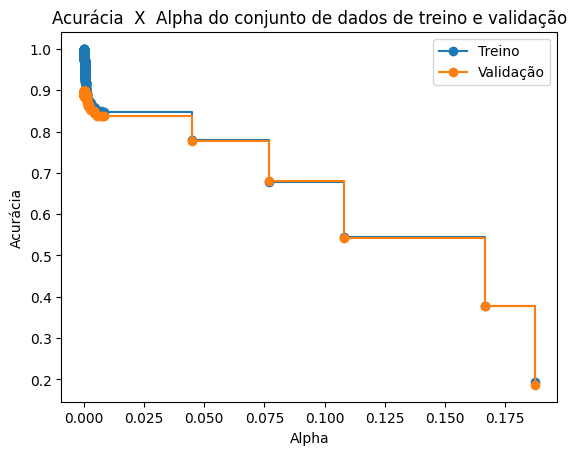

CPU times: total: 13.5 s
Wall time: 14.5 s


In [23]:
%%time

path = DecisionTreeClassifier(random_state=42).cost_complexity_pruning_path(X=X_train[cols], 
                                                                            y=y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, 
                                 ccp_alpha=ccp_alpha).fit(X=X_train[cols], 
                                                          y=y_train)
    clfs.append(clf)

train_scores = [clf.score(X=X_train[cols], y=y_train) for clf in clfs]
valid_scores = [clf.score(X=X_valid[cols], y=y_valid) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel(xlabel='Alpha')
ax.set_ylabel(ylabel='Acurácia')
ax.set_title(label='Acurácia  X  Alpha do conjunto de dados de treino e validação')
ax.plot(ccp_alphas, 
        train_scores, 
        marker='o', 
        label='Treino', 
        drawstyle='steps-post')
ax.plot(ccp_alphas, 
        valid_scores, 
        marker='o', 
        label='Validação', 
        drawstyle='steps-post')
ax.legend()
plt.show()

In [28]:
best_tree_index = len(valid_scores) - valid_scores[::-1].index(max(valid_scores)) - 1
best_tree = clfs[best_tree_index]

print(f'Acurácia da melhor árvore na base de validação: {valid_scores[best_tree_index] * 100:.2f}')

best_tree

Acurácia da melhor árvore na base de validação: 89.93


DecisionTreeClassifier(ccp_alpha=np.float64(0.00025537962736781327),
                       random_state=42)

### 5. Avaliação do modelo

Avalie a árvore encontrada no item anterior na base de testes.

Acurácia da melhor árvore na base de testes: 72.04


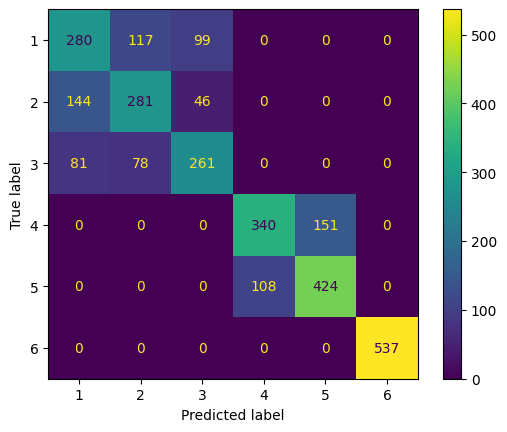

In [29]:
accuracy_test = best_tree.score(X=X_test[cols], 
                                y=y_test)

print(f'Acurácia da melhor árvore na base de testes: {accuracy_test * 100:.2f}')

ConfusionMatrixDisplay.from_estimator(estimator=best_tree, 
                                      X=X_test[cols], 
                                      y=y_test);